In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-21 16:12:18--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.2’

online+retail.zip.2     [      <=>           ]  22.62M   484KB/s    in 50s     

2025-03-21 16:13:09 (462 KB/s) - ‘online+retail.zip.2’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_excel('Online Retail.xlsx', dtype = {'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string' })

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Data Cleaning: Handle missing values



In [ ]:
df.isnull().sum() #Number of NA values per column in the dataframe

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df[df.StockCode == "23406"].Description.mode()

,Description
0,HOME SWEET HOME KEY HOLDER


In [ ]:
most_freq_desc = df[["StockCode", "Description"]].value_counts().reset_index()
most_freq_desc

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [ ]:
most_freq_desc[most_freq_desc.StockCode == "23406"].head(1)

,StockCode,Description,count
1428,23406,HOME SWEET HOME KEY HOLDER,114


In [ ]:
most_freq_desc = most_freq_desc.groupby("StockCode").head(1)
most_freq_desc

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [ ]:
most_freq_desc.columns = ["StockCode", "freqDescription", "count"]
df2 = df.merge(most_freq_desc, on = "StockCode", how = "left")
df2.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,BAKING SET 9 PIECE RETROSPOT,974.0


In [ ]:
df2["Description"] = df2["freqDescription"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freqDescription,112
count,112


In [ ]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freqDescription,0
count,0


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,count
count,541797.000000,541797,541797.000000,406829.000000,541797.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570,424.567967
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,1.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000,151.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000,303.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000,573.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2302.000000
std,218.103428,NaN,96.769831,1713.600303,391.068884


In [ ]:
df3 = df2[(df2.UnitPrice > 0) & (df2.Quantity > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,count
count,530104.000000,530104,530104.000000,397884.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453,424.852891
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,1.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000,152.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000,303.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000,573.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2302.000000
std,155.524124,NaN,35.915681,1713.141560,389.658735


In [ ]:
req_quantile = df3['Quantity'].quantile(0.99999) #99% of the quantity values are either equal to 100 or lower than 100
req_quantile


np.float64(3164.325840001926)

In [ ]:
df3[df3.Quantity>1500].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freqDescription,count
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,ASSORTED COLOUR T-LIGHT HOLDER,126.0
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542.0
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom,ASSORTED LAQUERED INCENSE HOLDERS,24.0
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom,GROW A FLYTRAP OR SUNFLOWER IN TIN,307.0
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0


In [ ]:
df_filtered = df[df['Quantity'] <= req_quantile]
df_filtered.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541900.000000,541900,541900.000000,406822.000000
mean,9.195313,2011-07-04 13:35:11.086215936,4.611181,15287.705893
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,3114.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,157.469017,NaN,96.760655,1713.591557


#### Feature Engineering: Creating New Columns!

In [ ]:
df4 = df_filtered.copy()
df4["TotalPrice"] = df4["Quantity"] * df4["UnitPrice"]
df4[df4['Quantity'] ==3114]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.1,15749.0,United Kingdom,6539.4
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.1,15749.0,United Kingdom,6539.4


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541900 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541900 non-null  string        
 1   StockCode    541900 non-null  string        
 2   Description  540447 non-null  string        
 3   Quantity     541900 non-null  int64         
 4   InvoiceDate  541900 non-null  datetime64[ns]
 5   UnitPrice    541900 non-null  float64       
 6   CustomerID   406822 non-null  float64       
 7   Country      541900 non-null  string        
 8   TotalPrice   541900 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 41.3 MB


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month #Since InvoiceDate is in the DATETIME format
df4['Year'] = df4['InvoiceDate'].dt.year
df4['Year'].value_counts() #Clearly, 2011 is in the majority

,count
Year,
2011,499419
2010,42481


In [ ]:
df4['Month'].value_counts()

,count
Month,
11,84710
12,68005
10,60741
9,50226
7,39517
5,37029
6,36873
3,36748
8,35284


In [ ]:
df4.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year
364613,568668,22114,HOT WATER BOTTLE TEA AND SYMPATHY,2,2011-09-28 13:00:00,4.25,15750.0,United Kingdom,8.50,9,2011
390555,570557,22569,FELTCRAFT CUSHION BUTTERFLY,192,2011-10-11 11:15:00,3.39,16029.0,United Kingdom,650.88,10,2011
403370,571563,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2011-10-18 10:07:00,1.45,16249.0,United Kingdom,17.40,10,2011


#### Visualization & EDA


##### 1. Plot Monthly Sales


In [ ]:
monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
monthly_sales

,TotalPrice
Month,
1,482816.660
2,494859.730
3,683267.080
4,493207.121
5,720237.510
6,691123.120
7,681108.951
8,682680.510
9,1019687.622


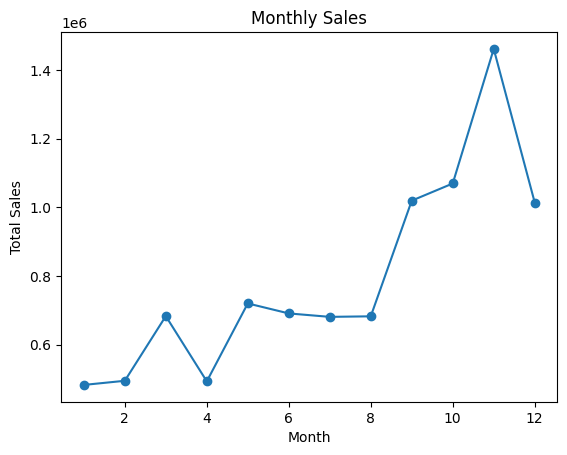

In [ ]:
monthly_sales.plot(kind='line', xlabel="Month", ylabel="Total Sales", title="Monthly Sales", marker="o")
plt.show()

###### Insight: Total Sales peak at November most likely due to the holiday season.

##### 2. Plot the first 5 countries with the Maximum Total Sales

In [ ]:
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().nlargest(5)
top_5_countries

,TotalPrice
Country,
United Kingdom,7934655.084
Netherlands,284661.540
EIRE,263276.820
Germany,221698.210
France,197403.900


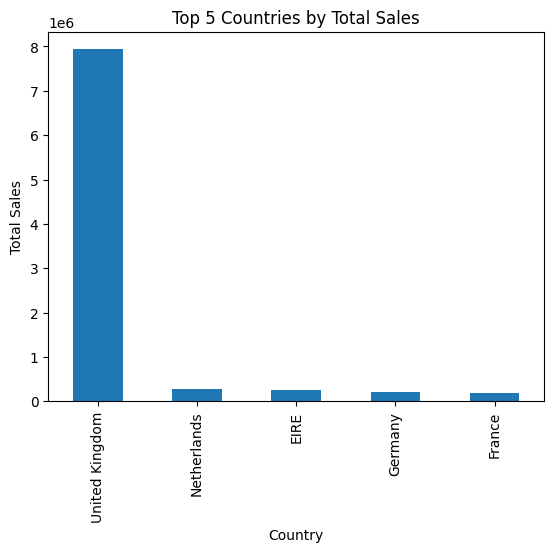

In [ ]:
top_5_countries.plot(kind="bar", xlabel="Country", ylabel="Total Sales", title="Top 5 Countries by Total Sales")
plt.show()

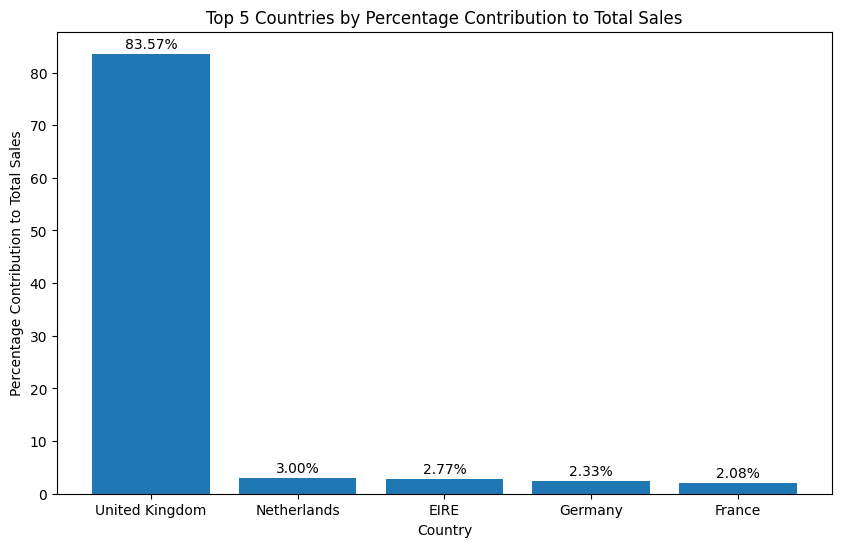

In [ ]:

total_sales = df4['TotalPrice'].sum()

country_sales = df4.groupby('Country')['TotalPrice'].sum()
percentage_contribution = (country_sales / total_sales) * 100

top_5_countries_percentage = percentage_contribution.nlargest(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_countries_percentage.index, top_5_countries_percentage.values)
plt.xlabel("Country")
plt.ylabel("Percentage Contribution to Total Sales")
plt.title("Top 5 Countries by Percentage Contribution to Total Sales")

# Display the percentage values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()


###### Insight: The UK's sales account for 83.6% of the overall total.

##### 3. Plot the first 5 products with the Maximum Total Sales

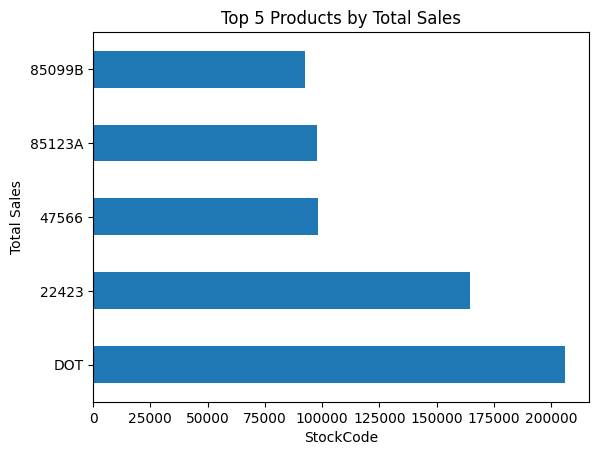

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.nlargest(5)
top_5_products.plot(kind="barh", xlabel="StockCode", ylabel="Total Sales", title="Top 5 Products by Total Sales")
plt.show()

In [ ]:
#Top 5 products + descriptions

for stock_code in top_5_products.index:
    product_name = df4[df4['StockCode'] == stock_code]['Description'].iloc[0]
    print(f"{stock_code} => {product_name}")

DOT => DOTCOM POSTAGE
22423 => REGENCY CAKESTAND 3 TIER
47566 => PARTY BUNTING
85123A => WHITE HANGING HEART T-LIGHT HOLDER
85099B => JUMBO BAG RED RETROSPOT


##### 4. RFM Analysis

In [ ]:
current_date = df4["InvoiceDate"].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df4.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'
    })

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.sample(5)

,Recency,Frequency,Monetary
CustomerID,,,
15795.0,150,42,610.01
16146.0,157,29,734.13
14997.0,46,27,540.98
17891.0,162,34,203.86
13318.0,1,20,640.76
